In [2]:
import pandas as pd
df=pd.read_csv("happiness.csv")

df = df.rename(columns={'Country name':'Country','Ladder score':'Happiness'})
df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'happiness.csv'

In [ ]:
df = df.loc[:,~df.columns.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     137 non-null    object 
 1   Happiness                                   137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

상관도가 음수거나 0에 가까운 열들 드랍.
Generosity, explained by: Generosity, Perceptions of corruption, Ladder score in Dystopia

In [ ]:
corr = df.corr()
corr['Happiness'].sort_values(ascending=False)


<ipython-input-5-36a8ddcf53b0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Happiness                                     1.000000
lowerwhisker                                  0.999448
upperwhisker                                  0.999401
Explained by: Social support                  0.834604
Social support                                0.834532
Logged GDP per capita                         0.784367
Explained by: Log GDP per capita              0.784342
Healthy life expectancy                       0.746928
Explained by: Healthy life expectancy         0.746699
Freedom to make life choices                  0.662924
Explained by: Freedom to make life choices    0.662909
Dystopia + residual                           0.494452
Explained by: Perceptions of corruption       0.471913
Generosity                                    0.044082
Explained by: Generosity                      0.043680
Perceptions of corruption                    -0.471911
Standard error of ladder score               -0.512628
Ladder score in Dystopia                           NaN
Name: Happ

In [ ]:
drop_c=['Perceptions of corruption','Explained by: Generosity','Generosity','Standard error of ladder score','Ladder score in Dystopia']
df.drop(columns=drop_c, inplace=True)

다중 변수 간 상관관계 확인
히트맵을 통해 행복도와 상관관계가 높은 변수들을 확인할 수 있음.
이때, 상관도가 클수록 더 진해지는 색상을 선
logged gdp per capita, social support, healthy life expectancy, freedom to make choices 4가지의 주요 변수들을 추릴 수 있음.



<ipython-input-7-8806b0ff21e5>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: title={'center': 'heatmap of the whole data'}>

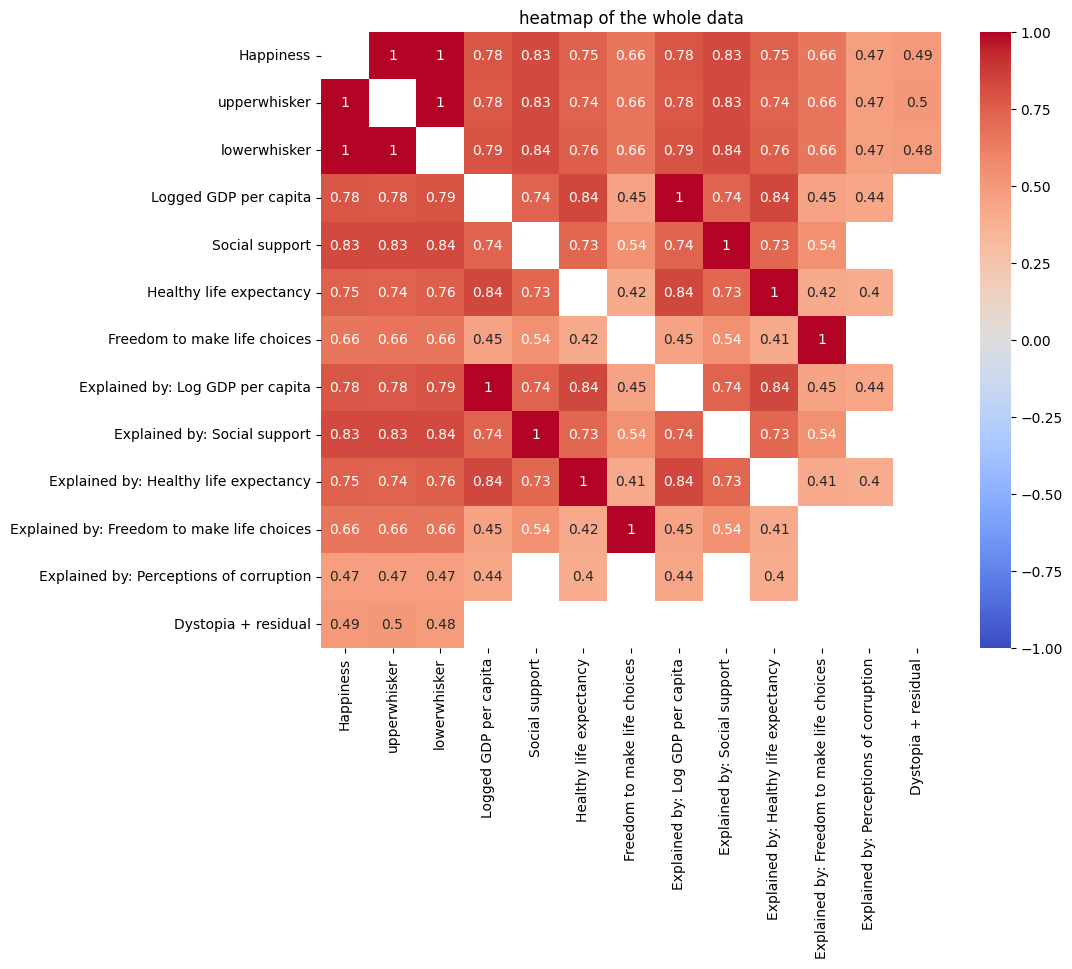

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
plt.title("heatmap of the whole data")
threshold = 0.4
correlation_matrix = df.corr()
high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)
sns.heatmap(correlation_matrix[high_correlation], annot=True,cmap='coolwarm', vmin=-1, vmax=1)



In [ ]:
df1=df.head(10)#행복도 상위 10개국
df2=df.tail(10)#행복도 하위 10개

두 변수 간 관계 확인 gdp, 행복

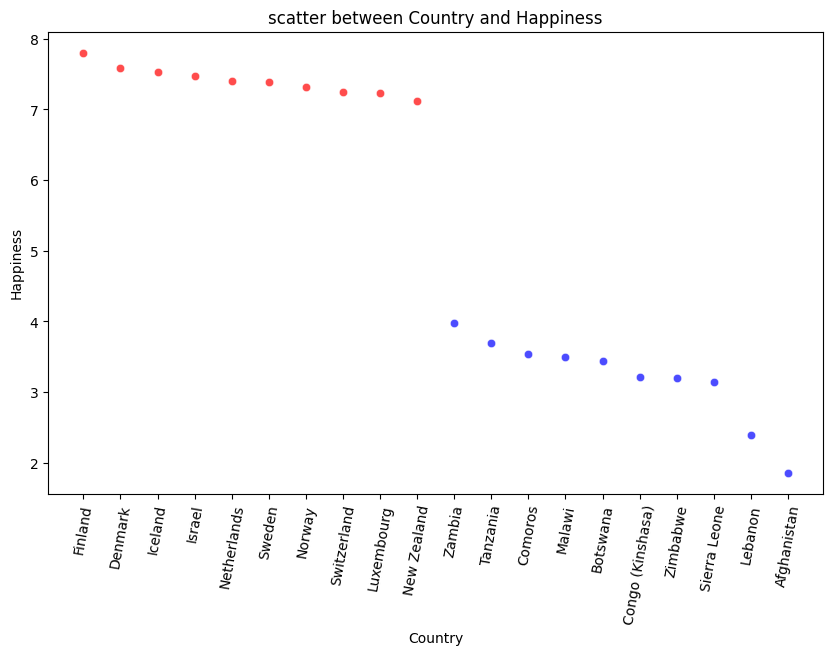

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df1, x='Country', y='Happiness',c='red',alpha=0.7)
sns.scatterplot(data=df2, x='Country', y='Happiness',c='blue',alpha=0.7)
plt.xlabel('Country')
plt.xticks(rotation=80)
plt.ylabel('Happiness')
plt.title('scatter between Country and Happiness')
plt.show()

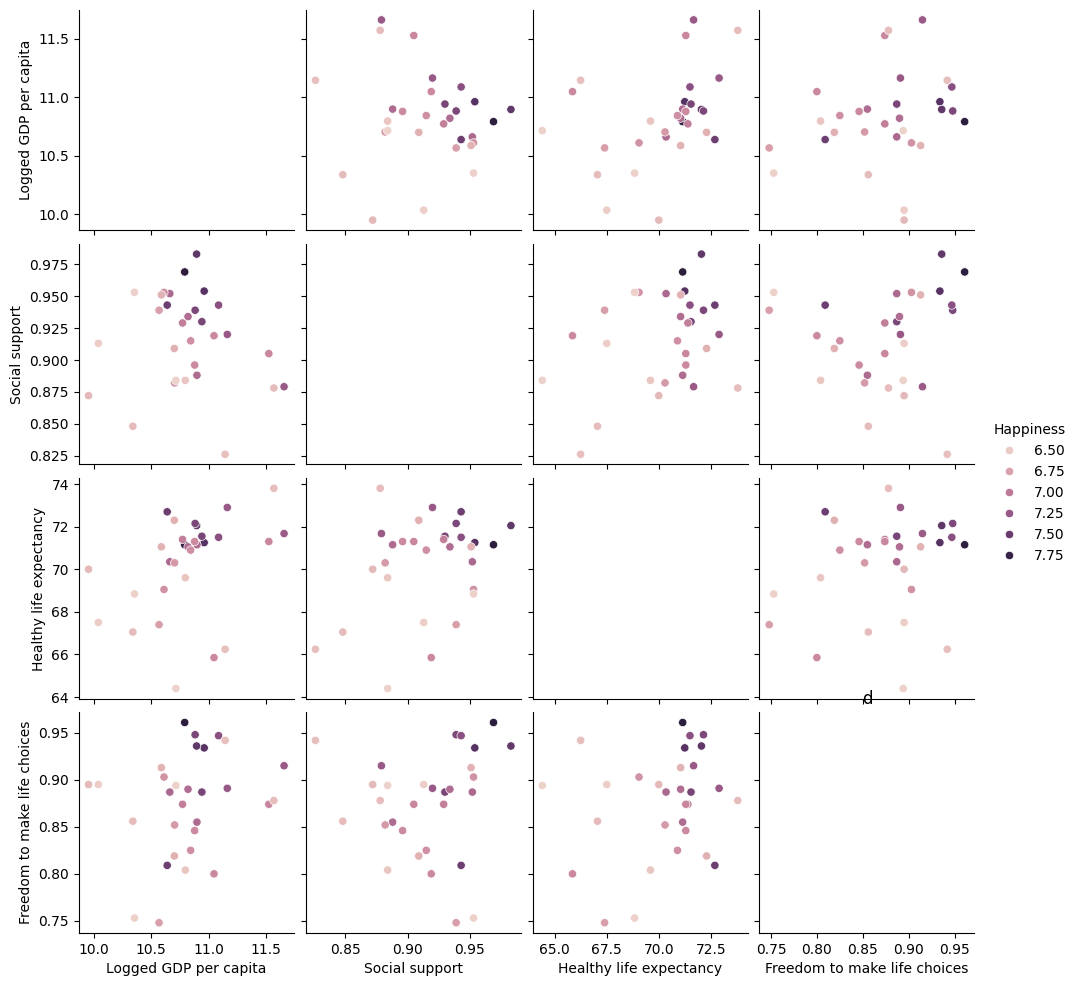

In [ ]:

short_df1 = df1[['Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices','Happiness']]
sns.pairplot(short_df1, hue="Happiness")
plt.title("d")
plt.show()

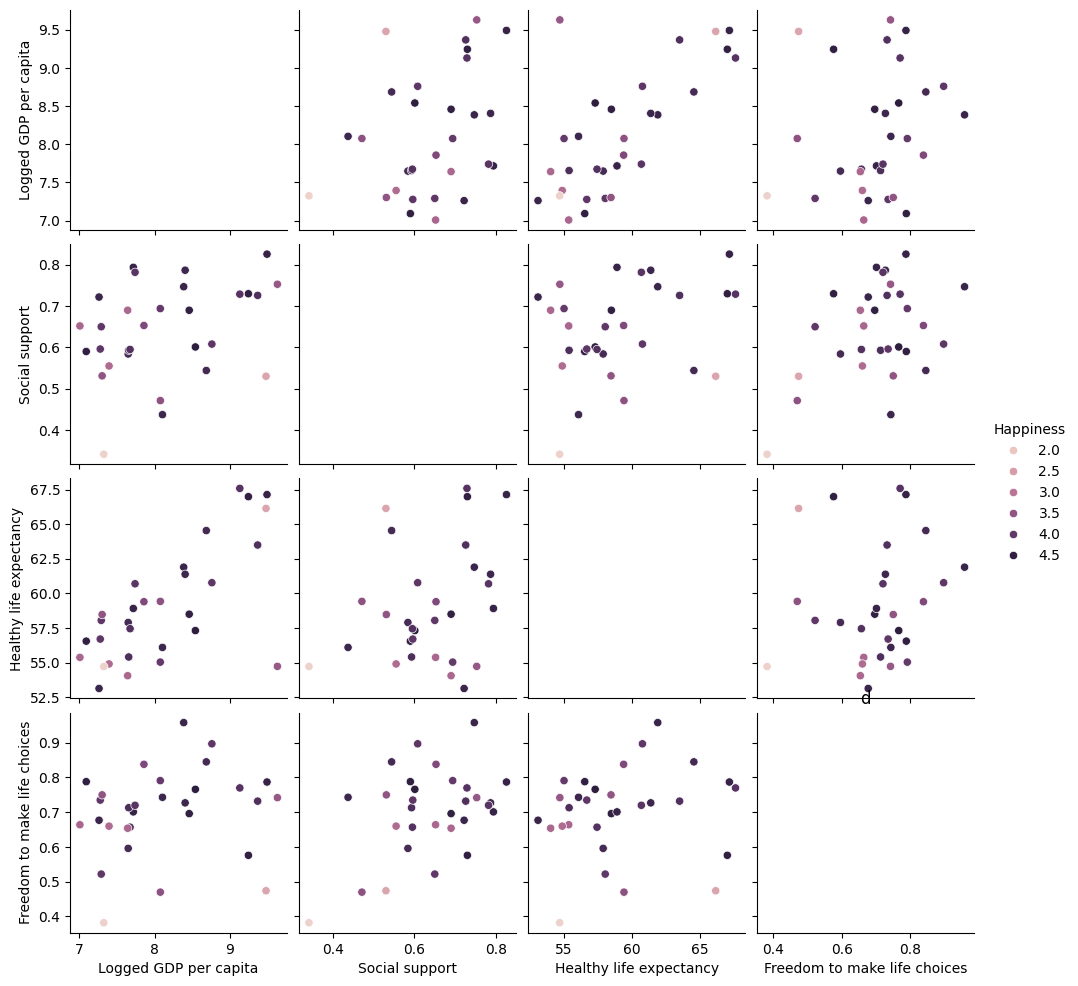

In [ ]:
short_df2= df2[['Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices','Happiness']]
sns.pairplot(short_df2, hue="Happiness")
plt.title("d")
plt.show()